In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

## Q1

In [2]:
# Parâmetros
t_sup = 100 + 273   # Temperatura superfície (K)
t_amb = 25 + 273    # Temperatura ambiente (K)
r = 12e-3           # Raio aleta (m)
L = 168e-3          # Comprimento aleta (m)
h = 10              # Coeficiente de transferência de calor (W/m2/K)
k = 204             # Condutividade térmica do Alumínio-2014 (W/mK)

In [3]:
# Support functions

def get_P(R):
    return pi*R*2

def get_A(R):
    return pi*R**2

def get_m(h, P, k, A):
    return sqrt(h*P/k/A)

def get_M(theta_b, h, P, k, A):
    return theta_b*sqrt(h*P*k*A)

def heat_transf_rate_A(m,L,M,h):
    
    numerador = sinh(m*L) + (h/m/k)*cosh(m*L)
    denominador = cosh(m*L) + (h/m/k)*sinh(m*L)
    
    return M*numerador/denominador

def get_temp_distrib(m, L, x):
    
    numerador = cosh(m*(L-x)) + (h/(m*k))*sinh(m*(L-x))
    denominador = cosh(m*L) + (h/(m*k))*sinh(m*L)
    
    return numerador/denominador

def get_T_L(t_amb, t_sup, temp_distrib):
    return temp_distrib*(t_sup - t_amb) + t_amb
    
def get_effectiviness(q_a, h, Ab, theta_b):
    return q_a / (h*Ab*theta_b)

def get_efficience(q_a, h, As, theta_b):
    return q_a / (h*As*theta_b)

In [4]:
P = get_P(r)              # Perímetro
A = get_A(r)              # Área
theta_b = t_sup - t_amb   # Dif temp.

m_q1 = get_m(h, P, k, A)
M_q1 = get_M(theta_b, h, P, k, A)
q_q1 = heat_transf_rate_A(m_q1, L, M_q1, h)

print(f"Taxa de transferencia de calor: {round(q_q1, 2)} W")

Taxa de transferencia de calor: 9.1 W


In [5]:
temp_distrib = get_temp_distrib(m_q1, L, L)

T_L = get_T_L(t_amb, t_sup, temp_distrib)

print(f"Temperatura na extremidade da aleta: {round(T_L, 2)} K")
print(f"Temperatura na extremidade da aleta: {round(T_L, 2) - 273} C")

Temperatura na extremidade da aleta: 364.6 K
Temperatura na extremidade da aleta: 91.60000000000002 C


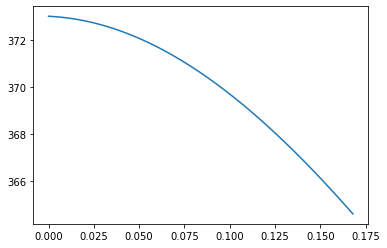

In [78]:
lista_L = np.arange(0, L, 1e-6)
lista_temp = []

for l in lista_L:
    temp_distrib = get_temp_distrib(m_q1, l, l)
    lista_temp.append(get_T_L(t_amb, t_sup, temp_distrib))
    
plt.plot(lista_L, lista_temp)

In [6]:
e_a = get_effectiviness(q_q1, h, A, theta_b)
n_a = get_efficience(q_q1, h, A, theta_b)

print(f"Efetividade: {round(e_a, 2)}")
print(f"Eficiencia: {round(n_a, 2)}")

Efetividade: 26.82
Eficiencia: 26.82


In [7]:
print(f"Taxa de transferencia de calor para aleta infinita: {round(M_q1,2)} W")

Taxa de transferencia de calor para aleta infinita: 19.78 W


In [81]:
heat_transf_goal = M_q1
lista_L = np.arange(0.0, 100.0, 0.0001)

for l in lista_L: 
    heat_transf = heat_transf_rate_A(m_q1, l, M_q1, h)
    if round(heat_transf,20) == round(heat_transf_goal,20) :
        print(f"O comprimento ideal seria {l} m")
        break

O comprimento ideal seria 6.3329 m


## Q2

a)

In [10]:
# Parâmetros
t_sup = 100 + 273   # Temperatura superfície (K)
t_amb = 25 + 273    # Temperatura ambiente (K)
r = 12e-3           # Raio aleta (m)
L = 168e-3          # Comprimento aleta (m)
h = 10              # Coeficiente de transferência de calor (W/m2/K)
k = 204             # Condutividade térmica do Alumínio-2014 (W/mK)

In [11]:
P = get_P(r)              # Perímetro
A = get_A(r)              # Área
theta_b = t_sup - t_amb   # Dif temp.

m_q2 = get_m(h, P, k, A)
M_q2 = get_M(theta_b, h, P, k, A)
q_q2 = heat_transf_rate_A(m_q2, L, M_q1, h)
q_q2

9.101184741612194

In [12]:
# Parâmetros com o diametro triplicado
r_linha = 12e-3 * 6       # Raio aleta (m) com o diametro triplicado

In [13]:
P_linha = get_P(r_linha)              # Perímetro
A_linha = get_A(r_linha)              # Área
theta_b = t_sup - t_amb   # Dif temp.

m_q2_linha = get_m(h, P_linha, k, A_linha)
M_q2_linha = get_M(theta_b, h, P_linha, k, A_linha)
q_q2_linha = heat_transf_rate_A(m_q2_linha, L, M_q1, h)
q_q2_linha

4.622999159249995

In [14]:
print(f"Taxa de remoção de calor com diâmetro normal: {q_q2}")
print(f"Taxa de remoção de calor com diâmetro triplicado: {q_q2_linha}")

Taxa de remoção de calor com diâmetro normal: 9.101184741612194
Taxa de remoção de calor com diâmetro triplicado: 4.622999159249995


b)

In [15]:
# Parâmetros
t_sup = 100 + 273   # Temperatura superfície (K)
t_amb = 25 + 273    # Temperatura ambiente (K)
r = 12e-3           # Raio aleta (m)
L = 168e-3          # Comprimento aleta (m)
h = 10              # Coeficiente de transferência de calor (W/m2/K)
k_aluminio = 240            # Condutividade térmica do Alumínio-2014 (W/mK)

In [16]:
P = get_P(r)              # Perímetro
A = get_A(r)              # Área
theta_b = t_sup - t_amb   # Dif temp.

m_q2_aluminio = get_m(h, P, k_aluminio, A)
M_q2_aluminio = get_M(theta_b, h, P, k_aluminio, A)
q_q2_aluminio = heat_transf_rate_A(m_q2_aluminio, L, M_q2_aluminio, h)
q_q2_aluminio

9.252171922773469

In [17]:
# Parâmetros
t_sup = 100 + 273   # Temperatura superfície (K)
t_amb = 25 + 273    # Temperatura ambiente (K)
r = 12e-3           # Raio aleta (m)
L = 168e-3          # Comprimento aleta (m)
h = 10              # Coeficiente de transferência de calor (W/m2/K)
k_cobre = 400             # Condutividade térmica do Alumínio-2014 (W/mK)

In [18]:
P = get_P(r)              # Perímetro
A = get_A(r)              # Área
theta_b = t_sup - t_amb   # Dif temp.

m_q2_cobre = get_m(h, P, k_cobre, A)
M_q2_cobre = get_M(theta_b, h, P, k_cobre, A)
q_q2_cobre = heat_transf_rate_A(m_q2_cobre, L, M_q2_cobre, h)
q_q2_cobre

9.732619667416115

In [19]:
print(f"Taxa de remoção de calor do bastão de cobre: {q_q2_aluminio}")
print(f"Taxa de remoção de calor do bastão de alumínio: {q_q2_cobre}")

Taxa de remoção de calor do bastão de cobre: 9.252171922773469
Taxa de remoção de calor do bastão de alumínio: 9.732619667416115
